# Personalised Mecidine - Exploratory Data Analysis

### Key Points for presentation
- Describe the problem.
- Describe the dataset using visualizations and statistical measures.
- Describe the challenges you might face and propose some solutions.
- Give a high level time plan for finishing the project.

## Goal of project
Automatically classify genetic mutations that contribute to cancer tumor growth drivers) vs. presence of mutations that don’t affect the tumors (passengers)

## Importing data

In [49]:
import pandas as pd

In [95]:
d_train = pd.read_csv('genetic-data/training_variants')
d_train.columns

Index(['ID', 'Gene', 'Variation', 'Class'], dtype='object')

### Variable Understanding

- ID - A specific gene of the specimen
- Gene - The specific gene where the mutation took place
- Variation - the nature of the mutation
- Class - Class which we must predict
    - between 1 and 9

In [51]:
# get intitial statistics for columns
d_train.describe()

,ID,Class
count,3321.000000,3321.000000
mean,1660.000000,4.365854
std,958.834449,2.309781
min,0.000000,1.000000
25%,830.000000,2.000000
50%,1660.000000,4.000000
75%,2490.000000,7.000000
max,3320.000000,9.000000


In [52]:
d_train.dtypes

ID            int64
Gene         object
Variation    object
Class         int64
dtype: object

In [53]:
d_train.apply(pd.Series.nunique)

ID           3321
Gene          264
Variation    2996
Class           9
dtype: int64

We now know that there are 3321 records in our training set - all of which are unique.
Although we have 264 unique genes and 2996 unique variations.
Lastly there are 9 classes.

In [54]:
d_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3321 entries, 0 to 3320
Data columns (total 4 columns):
ID           3321 non-null int64
Gene         3321 non-null object
Variation    3321 non-null object
Class        3321 non-null int64
dtypes: int64(2), object(2)
memory usage: 103.9+ KB


## Initial visualizations

### Class Visualizations

In [55]:
import seaborn as sns

In [56]:
# histogram of classes
sns.distplot(d_train['Class']);

- Not normally distributed
- Its 3 peaks seem to be class 1, 4, and 7?

In [57]:
# skewness and kurtosis
print("Skewness: %f" % d_train['Class'].skew())
print("Kurtosis: %f" % d_train['Class'].kurt())

Skewness: -0.113242
Kurtosis: -1.352660


- slight negative skew tells us that it is slightly left tailed
- negative value for kurtosis tells us it is slightly platykurtic (low)

### Adding Gene/Variation as Categories

In [73]:
# converting Gene and Variation to categories
d_train['Gene'] = d_train['Gene'].astype('category')
d_train['Variation'] = d_train['Variation'].astype('category')
d_train['Gene'].head().cat.codes
d_train['GeneCode'] = d_train['Gene'].cat.codes
d_train['VariationCode'] = d_train['Variation'].cat.codes
d_train.head()

,ID,Gene,Variation,Class,GeneCode,VariationCode
0,0,FAM58A,Truncating Mutations,1,85,2629
1,1,CBL,W802*,2,39,2856
2,2,CBL,Q249E,2,39,1897
3,3,CBL,N454D,3,39,1667
4,4,CBL,L399V,4,39,1447


In [59]:
%matplotlib inline
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt

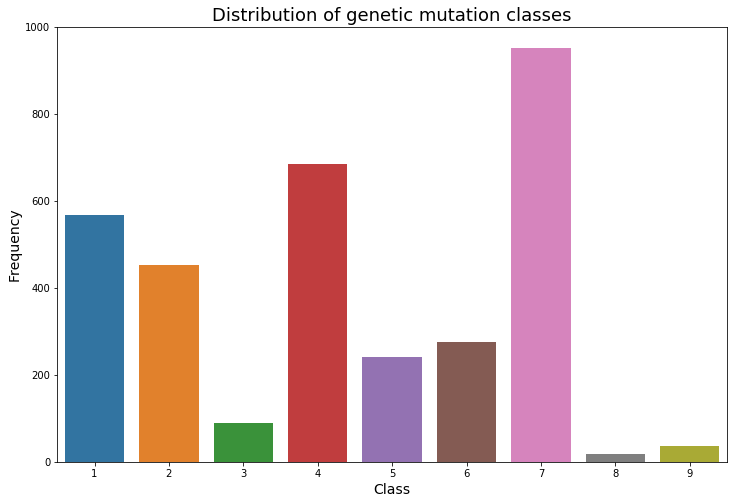

In [60]:
plt.figure(figsize=(12,8))
sns.countplot(x="Class", data=d_train)
plt.ylabel('Frequency', fontsize=14)
plt.xlabel('Class', fontsize=14)
plt.title("Distribution of genetic mutation classes", fontsize=18)
plt.show()

### Gene Visualizations

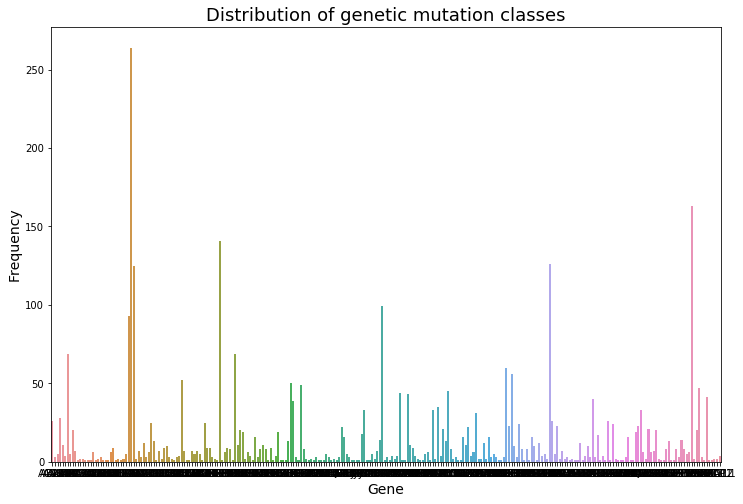

In [61]:
plt.figure(figsize=(12,8))
sns.countplot(x="Gene", data=d_train)
plt.ylabel('Frequency', fontsize=14)
plt.xlabel('Gene', fontsize=14)
plt.title("Distribution of genetic mutation classes", fontsize=18)
plt.show()

In [62]:
gene_group = d_train.groupby("Gene")['Gene'].count()


In [63]:
gene_group_asc = gene_group.sort_values(ascending=True)

In [64]:
print("Bottom-10 Gene Occurances\n", gene_group_asc[:10])
print()
print("Top-10 Gene Occurances\n", gene_group_asc.sort_values(ascending=False)[:10])

Bottom-10 Gene Occurances
 Gene
KLF4      1
FGF19     1
FANCC     1
FAM58A    1
PAK1      1
ERRFI1    1
PAX8      1
PIK3R3    1
PMS1      1
PPM1D     1
Name: Gene, dtype: int64

Top-10 Gene Occurances
 Gene
BRCA1     264
TP53      163
EGFR      141
PTEN      126
BRCA2     125
KIT        99
BRAF       93
ERBB2      69
ALK        69
PDGFRA     60
Name: Gene, dtype: int64


## Top 20 Genes then Top 20 Variation

In [75]:
print("Top-20 Gene Occurances\n")
top_20_genes = d_train.groupby("Gene")['Gene'].count().sort_values(ascending=False)[:20]
print(type(top_20_genes))
top_20_genes = top_20_genes.index.values
print(top_20_genes)
print(type(top_20_genes))
t20_genes_df = d_train[
    (d_train['Gene'].isin(top_20_genes))
]

Top-20 Gene Occurances

<class 'pandas.core.series.Series'>
[BRCA1, TP53, EGFR, PTEN, BRCA2, ..., MTOR, KRAS, MAP2K1, VHL, RET]
Length: 20
Categories (264, object): [ABL1, ACVR1, AGO2, AKT1, ..., WHSC1L1, XPO1, XRCC2, YAP1]
<class 'pandas.core.categorical.Categorical'>


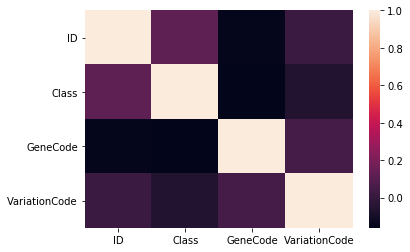

In [74]:
# Calculate correlations
corr = d_train.corr()

# Heatmap
sns.heatmap(corr)
plt.show()

In [83]:
# of the top-20 genes - display the count of the variations
print("Top-20 Variation Occurances within top-20 occuring genes\n")
print(t20_genes_df.groupby("Variation")['Variation'].count().sort_values(ascending=False)[:20])
t20_vars_arr = t20_genes_df.groupby("Variation")['Variation'].count().sort_values(ascending=False)[:20].index.values
print("The list of top 20 vars subset: ", t20_vars_arr)

Top-20 Variation Occurances within top-20 occuring genes

Variation
Amplification           10
Deletion                 6
Truncating Mutations     6
Fusions                  4
T167A                    2
R841K                    2
I31M                     2
p61BRAF                  1
K525E                    1
K517R                    1
K513R                    1
K50L                     1
K550_K558del             1
K50E                     1
K509I                    1
K499E                    1
K483M                    1
K483E                    1
K467T                    1
K526E                    1
Name: Variation, dtype: int64
The list of top 20 vars subset:  [Amplification, Deletion, Truncating Mutations, Fusions, T167A, ..., K499E, K483M, K483E, K467T, K526E]
Length: 20
Categories (2996, object): [1_2009trunc, 2010_2471trunc, 256_286trunc, 3' Deletion, ..., YAP1-MAMLD1 Fusion, ZC3H7B-BCOR Fusion, ZNF198-FGFR1 Fusion, p61BRAF]


In [86]:
t20_vars_df = t20_genes_df[
    (t20_genes_df['Variation'].isin(t20_vars_arr))
]
print(t20_vars_df)

        ID    Gene             Variation  Class  GeneCode  VariationCode
145    145    EGFR                 K467T      2        66           1263
204    204    EGFR         Amplification      7        66            149
260    260    EGFR                 R841K      1        66           2258
417    417    TP53  Truncating Mutations      1       252           2629
650    650  CDKN2A  Truncating Mutations      1        51           2629
664    664  CDKN2A              Deletion      4        51            473
744    744   ERBB2         Amplification      7        72            149
880    880  PDGFRA                 R841K      7       179           2258
912    912  PDGFRA         Amplification      7       179            149
1015  1015    TSC2  Truncating Mutations      1       255           2629
1036  1036    TSC2              Deletion      1       255            473
1165  1165  PIK3CA                  I31M      5       181           1156
1198  1198  PIK3CA         Amplification      2    

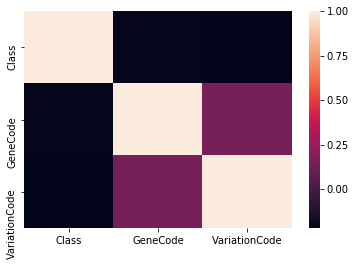

In [94]:
# Calculate correlations
corr2 = t20_vars_df[['Class', 'GeneCode', 'VariationCode']].corr()

# Heatmap
sns.heatmap(corr2)
plt.show()

## Variation Top 20 then Gene Top 20

In [96]:
t20_vars_arr = d_train.groupby("Variation")['Variation'].count().sort_values(ascending=False)[:20].index.values
print("The list of top 20 vars subset: ", t20_vars_arr)

The list of top 20 vars subset:  ['Truncating Mutations' 'Deletion' 'Amplification' 'Fusions'
 'Overexpression' 'G12V' 'E17K' 'T58I' 'Q61L' 'Q61R' 'Q61H'
 'ETV6-NTRK3 Fusion' 'T286A' 'P34R' 'EWSR1-ETV1 Fusion' 'G12S' 'Y42C'
 'Q61K' 'I31M' 'G12A']


In [101]:
t20_vars_df = t20_genes_df[
    (t20_genes_df['Variation'].isin(t20_vars_arr))
]
print(t20_vars_df)
t20_genes_arr = t20_vars_df.groupby("Gene")['Gene'].count().sort_values(ascending=False)[:20]
print(t20_genes_arr)
top_20_genes = t20_genes_arr.index.values
t20_genes_df = t20_vars_df[
    (t20_vars_df['Gene'].isin(top_20_genes))
]
print(t20_genes_df)

        ID    Gene             Variation  Class  GeneCode  VariationCode
204    204    EGFR         Amplification      7        66            149
417    417    TP53  Truncating Mutations      1       252           2629
650    650  CDKN2A  Truncating Mutations      1        51           2629
664    664  CDKN2A              Deletion      4        51            473
744    744   ERBB2         Amplification      7        72            149
912    912  PDGFRA         Amplification      7       179            149
1015  1015    TSC2  Truncating Mutations      1       255           2629
1036  1036    TSC2              Deletion      1       255            473
1165  1165  PIK3CA                  I31M      5       181           1156
1198  1198  PIK3CA         Amplification      2       181            149
1456  1456   FGFR2               Fusions      2        94            807
1538  1538     ALK         Amplification      2         6            149
1560  1560     ALK               Fusions      2    

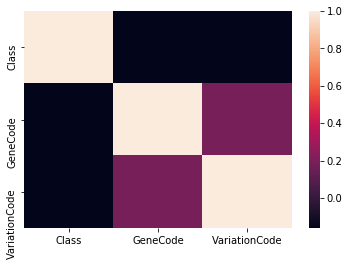

In [103]:
# Calculate correlations
corr3 = t20_genes_df[['Class', 'GeneCode', 'VariationCode']].corr()

# Heatmap
sns.heatmap(corr3)
plt.show()

## Top 20 Genes Class Distribution

Fresh Data Set

In [65]:
d_train = pd.read_csv('genetic-data/training_variants')
# converting Gene and Variation to categories
d_train['Gene'] = d_train['Gene'].astype('category')
d_train['Variation'] = d_train['Variation'].astype('category')
d_train['Gene'].head().cat.codes
d_train['GeneCode'] = d_train['Gene'].cat.codes
d_train['VariationCode'] = d_train['Variation'].cat.codes
d_train.head()

,ID,Gene,Variation,Class,GeneCode,VariationCode
0,0,FAM58A,Truncating Mutations,1,85,2629
1,1,CBL,W802*,2,39,2856
2,2,CBL,Q249E,2,39,1897
3,3,CBL,N454D,3,39,1667
4,4,CBL,L399V,4,39,1447


Getting top 20 genes from fresh dataset

In [66]:
t20_genes_arr = d_train.groupby("Gene")['Gene'].count().sort_values(ascending=False)[:20]
print(t20_genes_arr)
top_20_genes = t20_genes_arr.index.values
t20_genes_df = d_train[
    (d_train['Gene'].isin(top_20_genes))
]
print(t20_genes_df)

Gene
BRCA1     264
TP53      163
EGFR      141
PTEN      126
BRCA2     125
KIT        99
BRAF       93
ERBB2      69
ALK        69
PDGFRA     60
PIK3CA     56
CDKN2A     52
FGFR2      50
FLT3       49
TSC2       47
MTOR       45
KRAS       44
MAP2K1     43
VHL        41
RET        40
Name: Gene, dtype: int64
        ID  Gene          Variation  Class  GeneCode  VariationCode
138    138  EGFR   L747_T751delinsP      7        66           1519
139    139  EGFR       S752_I759del      2        66           2465
140    140  EGFR              I491M      5        66           1168
141    141  EGFR       D770_P772dup      7        66            421
142    142  EGFR              G719A      7        66            975
143    143  EGFR              G735S      7        66            980
144    144  EGFR       N771_H773dup      7        66           1707
145    145  EGFR              K467T      2        66           1263
146    146  EGFR     E746_T751insIP      7        66            641
147    147

In [67]:
#g = sns.FacetGrid(t20_genes_df, col="Class", col_wrap=2, size=4, aspect=2, hue="Class", margin_titles=True, sharex=False)
#g.map(plt.hist, "Gene", alpha=0.7, edgecolor='#000000', align='left');
#for ax in g.axes.flat:
#    for label in ax.get_xticklabels():
#        label.set_rotation(0)
#plt.tight_layout()
g = sns.factorplot(x="Gene", hue="Gene", col="Class", data=t20_genes_df, kind="count")
plt.show()

KeyboardInterrupt: 

In [ ]:
t20_genes_df.head(20)

## Natural Language Processing

In [15]:
import pandas as pd       
#train = pd.read_csv("genetic-data/training_text", header=0, sep='\|\|', engine='python')
train = pd.read_csv("genetic-data/training_text", sep='\|\|', skiprows=1, engine='python', names=['ID', 'Text'])

In [16]:
print(train.head())
print("train shape = ", train.shape)
print("train index values = ", train.columns.values)

   ID                                               Text
0   0  Cyclin-dependent kinases (CDKs) regulate a var...
1   1   Abstract Background  Non-small cell lung canc...
2   2   Abstract Background  Non-small cell lung canc...
3   3  Recent evidence has demonstrated that acquired...
4   4  Oncogenic mutations in the monomeric Casitas B...
train shape =  (3321, 2)
train index values =  ['ID' 'Text']


In [17]:
# Import BeautifulSoup into your workspace
from bs4 import BeautifulSoup             

# regex
import re

# nltk
import nltk
from nltk.corpus import stopwords # Import the stop word list
print(stopwords.words("english"))

['i', 'me', 'my', 'myself', 'we', 'our', 'ours', 'ourselves', 'you', "you're", "you've", "you'll", "you'd", 'your', 'yours', 'yourself', 'yourselves', 'he', 'him', 'his', 'himself', 'she', "she's", 'her', 'hers', 'herself', 'it', "it's", 'its', 'itself', 'they', 'them', 'their', 'theirs', 'themselves', 'what', 'which', 'who', 'whom', 'this', 'that', "that'll", 'these', 'those', 'am', 'is', 'are', 'was', 'were', 'be', 'been', 'being', 'have', 'has', 'had', 'having', 'do', 'does', 'did', 'doing', 'a', 'an', 'the', 'and', 'but', 'if', 'or', 'because', 'as', 'until', 'while', 'of', 'at', 'by', 'for', 'with', 'about', 'against', 'between', 'into', 'through', 'during', 'before', 'after', 'above', 'below', 'to', 'from', 'up', 'down', 'in', 'out', 'on', 'off', 'over', 'under', 'again', 'further', 'then', 'once', 'here', 'there', 'when', 'where', 'why', 'how', 'all', 'any', 'both', 'each', 'few', 'more', 'most', 'other', 'some', 'such', 'no', 'nor', 'not', 'only', 'own', 'same', 'so', 'than', '

In [27]:
def review_to_words( raw_review ):
    # Function to convert a raw review to a string of words
    # The input is a single string (a raw movie review), and 
    # the output is a single string (a preprocessed movie review)
    #
    # 1. Remove HTML
    review_text = BeautifulSoup(raw_review, 'html.parser').get_text() 
    #
    # 2. Remove non-letters        
    letters_only = re.sub("[^a-zA-Z\-]", " ", review_text) 
    #
    # 3. Convert to lower case, split into individual words
    words = letters_only.lower().split()                             
    #
    # 4. In Python, searching a set is much faster than searching
    #   a list, so convert the stop words to a set
    stops = set(stopwords.words("english"))                  
    # 
    # 5. Remove stop words
    meaningful_words = [w for w in words if not w in stops]   
    #
    # 6. Join the words back into one string separated by space, 
    # and return the result.
    return( " ".join( meaningful_words ))   

In [28]:
#print(train["Text"][1])
# Get the number of reviews based on the dataframe column size
num_reviews = train["Text"].size
print(num_reviews)

print("Cleaning and parsing the training set movie reviews...\n")
clean_train_reviews = []
for i in range( 0,num_reviews ):
    # If the index is evenly divisible by 1000, print a message
    if( (i+1)%1000 == 0 ):
        print("Review %d of %d\n" % ( i+1, num_reviews ))                                                                    
    clean_train_reviews.append( review_to_words( train["Text"][i] ))

3321
Cleaning and parsing the training set movie reviews...

Review 1000 of 3321

Review 2000 of 3321

Review 3000 of 3321



In [29]:
print("Creating the bag of words...\n")
from sklearn.feature_extraction.text import CountVectorizer

# Initialize the "CountVectorizer" object, which is scikit-learn's
# bag of words tool.  
vectorizer = CountVectorizer(analyzer = "word",   \
                             tokenizer = None,    \
                             preprocessor = None, \
                             stop_words = None,   \
                             max_features = 7500) 

# fit_transform() does two functions: First, it fits the model
# and learns the vocabulary; second, it transforms our training data
# into feature vectors. The input to fit_transform should be a list of 
# strings.
train_data_features = vectorizer.fit_transform(clean_train_reviews)

# Numpy arrays are easy to work with, so convert the result to an 
# array
train_data_features = train_data_features.toarray()

Creating the bag of words...



In [34]:
print(train_data_features.shape)
print(type(train_data_features))

(3321, 7500)
<class 'numpy.ndarray'>


In [35]:
# Take a look at the words in the vocabulary
vocab = vectorizer.get_feature_names()
print(vocab)

['aa', 'aaa', 'aac', 'aacr', 'aacrjournals', 'aag', 'ab', 'abbott', 'abbreviations', 'abc', 'abcam', 'abcb', 'abd', 'abdomen', 'abdominal', 'aberrant', 'aberrantly', 'aberration', 'aberrations', 'abh', 'abi', 'abilities', 'ability', 'abiraterone', 'abl', 'ablation', 'able', 'abnormal', 'abnormalities', 'abnormality', 'abolish', 'abolished', 'abolishes', 'abolishing', 'above', 'abraxas', 'abrogate', 'abrogated', 'abrogates', 'abrogation', 'absence', 'absent', 'absolute', 'absolutely', 'absorbance', 'abstract', 'abt', 'abundance', 'abundant', 'ac', 'aca', 'acc', 'accelerate', 'accelerated', 'accepted', 'acceptor', 'access', 'accessibility', 'accessible', 'accession', 'accommodate', 'accompanied', 'accompanying', 'accomplished', 'accordance', 'according', 'accordingly', 'account', 'accounted', 'accounting', 'accounts', 'accumulate', 'accumulated', 'accumulates', 'accumulating', 'accumulation', 'accuracy', 'accurate', 'accurately', 'acetate', 'acetic', 'acetyl', 'acetylated', 'acetylation'

In [38]:
import numpy as np

# Sum up the counts of each vocabulary word
dist = np.sum(train_data_features, axis=0)

# For each, print the vocabulary word and the number of times it 
# appears in the training set
for tag, count in zip(vocab, dist):
    print(tag, count)

aa 3710
aaa 290
aac 313
aacr 507
aacrjournals 3233
aag 492
ab 1446
abbott 201
abbreviations 765
abc 961
abcam 579
abcb 203
abd 978
abdomen 207
abdominal 450
aberrant 4301
aberrantly 484
aberration 567
aberrations 2929
abh 329
abi 1369
abilities 452
ability 15652
abiraterone 202
abl 7634
ablation 495
able 5706
abnormal 1879
abnormalities 2907
abnormality 623
abolish 1245
abolished 1296
abolishes 407
abolishing 201
above 192
abraxas 206
abrogate 1057
abrogated 1557
abrogates 401
abrogation 477
absence 11187
absent 1911
absolute 710
absolutely 257
absorbance 347
abstract 1114
abt 224
abundance 1215
abundant 767
ac 2110
aca 290
acc 1948
accelerate 337
accelerated 829
accepted 907
acceptor 717
access 2918
accessibility 248
accessible 2579
accession 1479
accommodate 554
accompanied 1291
accompanying 305
accomplished 218
accordance 1563
according 11154
accordingly 1259
account 2698
accounted 694
accounting 478
accounts 830
accumulate 647
accumulated 627
accumulates 302
accumulating 360
accumu

bs 240
bsa 748
bt 549
btb 2316
btk 675
buffer 8558
buffered 797
build 336
building 297
built 325
bulk 275
bulkier 224
bulky 504
bundle 562
burden 973
buried 1839
burkitt 734
bxpc 419
bypass 381
ca 18141
caa 272
caax 850
cac 413
cadherin 1772
cae 198
caenorhabditis 322
caf 221
cag 531
caga 192
cah 419
cal 222
calbiochem 527
calcium 1089
calculate 851
calculated 5759
calculation 515
calculations 491
calf 1024
california 568
call 450
called 1998
calling 445
calls 692
calorimetry 378
cam 208
cambridge 541
came 302
camera 354
camp 449
can 269
canada 449
cance 256
cancer 99951
cancerdiscovery 979
cancerous 234
cancerres 639
cancers 21275
candidate 2812
candidates 671
cannot 4114
canonical 2319
cant 502
cantly 271
cap 281
capabilities 198
capability 570
capable 1803
capacity 2527
capillary 395
capture 1325
captured 531
carbon 422
carbonyl 522
carboplatin 437
carboxy 1088
carboxyl 1060
carboxylate 266
carcinogen 305
carcinogenesis 1570
carcinoma 9024
carcinomas 5087
card 1674
cardiac 762
cardi

easy 343
eb 1080
ebc 293
ebna 194
ebp 897
ebraf 666
ebv 709
ec 1267
ecd 871
ecl 489
ecm 252
ecog 312
ecori 951
ecorv 206
ect 235
ectodomain 367
ectopic 1685
ectopically 678
ed 2777
edge 217
edited 289
edta 2012
edu 861
eec 198
eecs 537
ef 790
effect 22700
effective 5140
effectively 2030
effectiveness 803
effector 3233
effectors 2384
effects 19116
effi 268
efficacious 252
efficacy 4327
efficiencies 405
efficiency 2407
efficient 1595
efficiently 1758
effort 1255
efforts 1739
effusion 537
effusions 325
efs 223
eg 364
egf 4552
egfp 2434
egfr 54831
egfrs 397
egfrviii 1260
egta 297
egy 272
eight 5507
eighteen 256
eighty 251
either 20146
ek 238
el 296
electron 889
electrophoresed 422
electrophoresis 1860
electrophoretic 464
electroporation 376
electrostatic 819
elegans 582
element 1265
elements 2534
elevate 209
elevated 4566
elevation 493
eleven 555
elf 2758
elicit 309
elicited 200
elicits 204
eligibility 209
eligible 461
eliminate 460
eliminated 541
eliminating 332
elimination 266
elisa 468


insufficient 854
insulin 2163
int 207
intact 2408
integral 281
integrated 1853
integration 1124
integrations 228
integrative 901
integrin 529
integrins 211
integrity 1727
intense 414
intensities 659
intensity 2334
intensive 489
inter 747
interact 4876
interacted 386
interacting 2405
interaction 20159
interactions 11604
interacts 3184
interchromosomal 193
interdomain 407
interest 2843
interesting 1770
interestingly 7982
interface 4767
interfaces 426
interfere 1235
interference 1139
interferes 313
interfering 826
interferon 372
interleukin 866
intermediate 5018
intermediates 317
intermolecular 522
internal 2456
internalization 438
international 1205
interphase 443
interplay 244
interpret 285
interpretation 1948
interpreted 484
interpreting 257
interrogate 218
interrogated 215
interstitial 532
interval 1082
intervals 538
intervening 298
intervention 747
interventions 190
intestinal 958
intestine 679
intolerant 546
intra 629
intracellular 2946
intracranial 191
intragenic 637
intramolecular

odyssey 252
of 6538
off 650
offer 756
offered 345
offers 244
offspring 213
often 4171
og 260
oh 381
oht 832
oil 198
olaparib 785
old 2539
older 685
oligo 439
oligodendroglioma 286
oligodendrogliomas 411
oligomer 213
oligomeric 396
oligomerization 1446
oligomers 303
oligonucleotide 1251
oligonucleotides 1116
olympus 316
omim 414
on 472
oncogene 5637
oncogenes 2916
oncogenesis 1118
oncogenic 17098
oncogenicity 403
oncol 375
oncology 1947
oncoprotein 547
oncoproteins 587
one 40627
ones 516
ongoing 1210
online 3164
onlinefirst 1252
only 412
onset 2319
onto 2435
op 513
open 4259
operate 218
operator 224
opportunities 444
opportunity 507
opposed 322
opposing 229
opposite 939
optical 192
optimal 1221
optimization 190
optimized 440
option 503
options 3318
oral 1325
orally 576
orange 926
order 3445
ordered 459
oregon 212
orf 881
orfs 227
org 6672
organ 781
organism 210
organisms 251
organization 898
organs 766
orientation 1190
orientations 251
origin 2380
original 2222
originally 1280
originate

responder 328
responders 1013
responding 417
response 27108
responses 5809
responsible 3721
responsive 2715
responsiveness 1561
rest 772
resting 190
restoration 583
restore 1014
restored 857
restores 392
restoring 257
restricted 1522
restriction 1813
result 13409
resultant 493
resulted 7102
resulting 8422
results 45879
resuspended 1215
ret 6762
retain 1159
retained 2757
retaining 307
retains 719
retardation 567
retention 1006
reticulocyte 301
retinal 272
retinoblastoma 822
retinoic 203
retrieval 308
retrieved 353
retrospective 821
retrospectively 495
retroviral 2039
retrovirally 291
retrovirus 1174
retroviruses 684
rev 447
reveal 2730
revealed 12162
revealing 526
reveals 1512
reversal 230
reverse 4954
reversed 441
reversible 798
reversion 193
review 3783
reviewed 3010
reviews 207
revised 302
rfs 274
rg 641
rhabdoid 198
rhabdomyosarcoma 267
rhd 238
rheb 2201
rho 1209
rhoa 3793
ri 414
ribbon 667
ribose 218
ribosomal 582
rich 2739
rictor 654
ridge 383
right 4515
rights 666
rigid 748
rigid

vb 378
vbc 684
vcap 501
vcb 247
vec 291
vector 13902
vectors 3141
vegf 1072
vegfa 686
vegfr 1173
vehicle 1730
vein 219
vemurafenib 1758
ventricular 189
vera 313
verified 1762
verify 768
versa 220
version 3976
versions 641
versus 5407
vertebrate 396
vertebrates 197
vertical 402
vessels 301
vgp 433
vhl 6423
vi 236
via 6485
viability 3332
viable 1361
vic 692
vice 220
vicinity 443
view 5906
viewed 215
viewer 610
viewerdownload 491
views 204
viii 409
vimentin 245
vinorelbine 195
violet 574
viral 1525
virtually 610
virtue 224
virus 1781
viruses 402
visible 528
vismodegib 1868
visual 312
visualization 457
visualize 262
visualized 2076
visually 272
vital 344
vitro 21115
vivo 13776
vo 364
vol 1734
volume 4020
volumes 446
von 360
vorinostat 237
vp 244
vras 405
vs 3974
vus 13526
vuss 3380
vx 194
vysis 269
waals 652
waf 935
walker 272
wall 302
waltham 206
wang 1245
wanted 219
wapcre 783
warranted 442
warrants 207
wash 373
washed 4139
washes 393
washing 798
washington 355
wat 253
water 2527
wave 29

## EDA - Word Text 2

In [39]:
import pandas as pd       
#train = pd.read_csv("genetic-data/training_text", header=0, sep='\|\|', engine='python')
train_v = pd.read_csv("genetic-data/training_variants")
test_v = pd.read_csv("genetic-data/test_variants")
train_t = pd.read_csv("genetic-data/training_text", sep='\|\|', skiprows=1, engine='python', names=['ID', 'Text'])
test_t = pd.read_csv("genetic-data/test_text", sep='\|\|', skiprows=1, engine='python', names=['ID', 'Text'])
print(train_v.head())
print("train_v shape = ", train_v.shape)
print("train_v index values = ", train_v.columns.values)
print(test_v.head())
print("test_v shape = ", test_v.shape)
print("test_v index values = ", test_v.columns.values)
print(train.head())
print("train shape = ", train.shape)
print("train index values = ", train.columns.values)
print(test.head())
print("test shape = ", test.shape)
print("test index values = ", test.columns.values)

   ID    Gene             Variation  Class
0   0  FAM58A  Truncating Mutations      1
1   1     CBL                 W802*      2
2   2     CBL                 Q249E      2
3   3     CBL                 N454D      3
4   4     CBL                 L399V      4
train_v shape =  (3321, 4)
train_v index values =  ['ID' 'Gene' 'Variation' 'Class']
   ID     Gene Variation
0   0    ACSL4     R570S
1   1    NAGLU     P521L
2   2      PAH     L333F
3   3     ING1     A148D
4   4  TMEM216      G77A
test_v shape =  (5668, 3)
test_v index values =  ['ID' 'Gene' 'Variation']
   ID                                               Text
0   0  Cyclin-dependent kinases (CDKs) regulate a var...
1   1   Abstract Background  Non-small cell lung canc...
2   2   Abstract Background  Non-small cell lung canc...
3   3  Recent evidence has demonstrated that acquired...
4   4  Oncogenic mutations in the monomeric Casitas B...
train shape =  (3321, 2)
train index values =  ['ID' 'Text']
   ID                        

### Merging test and variant data with its associated text based on ID.

In [44]:
import matplotlib.pyplot as plt
import seaborn as sns
train_df = pd.merge(train_v, train_t, how='left', on='ID')
test_df = pd.merge(test_v, test_t, how='left', on='ID')

In [45]:
train_df.head(20)

,ID,Gene,Variation,Class,Text
0,0,FAM58A,Truncating Mutations,1,Cyclin-dependent kinases (CDKs) regulate a var...
1,1,CBL,W802*,2,Abstract Background Non-small cell lung canc...
2,2,CBL,Q249E,2,Abstract Background Non-small cell lung canc...
3,3,CBL,N454D,3,Recent evidence has demonstrated that acquired...
4,4,CBL,L399V,4,Oncogenic mutations in the monomeric Casitas B...
5,5,CBL,V391I,4,Oncogenic mutations in the monomeric Casitas B...
6,6,CBL,V430M,5,Oncogenic mutations in the monomeric Casitas B...
7,7,CBL,Deletion,1,CBL is a negative regulator of activated recep...
8,8,CBL,Y371H,4,Abstract Juvenile myelomonocytic leukemia (JM...
9,9,CBL,C384R,4,Abstract Juvenile myelomonocytic leukemia (JM...


In [47]:
test_df.head(20)

,ID,Gene,Variation,Text
0,0,ACSL4,R570S,2. This mutation resulted in a myeloproliferat...
1,1,NAGLU,P521L,Abstract The Large Tumor Suppressor 1 (LATS1)...
2,2,PAH,L333F,Vascular endothelial growth factor receptor (V...
3,3,ING1,A148D,Inflammatory myofibroblastic tumor (IMT) is a ...
4,4,TMEM216,G77A,Abstract Retinoblastoma is a pediatric retina...
5,5,CD40LG,A123E,The accurate determination of perfluoroalkyl s...
6,6,KLF11,T220M,Aberrations in the mTOR (mechanistic target of...
7,7,SGCB,T151R,Oncogenic mutations in the monomeric Casitas B...
8,8,CLCF1,R197L,NPM1 gene at chromosome 5q35 is involved in re...
9,9,SDHAF1,R55P,Introduction The epidermal growth factor recep...
